# Stock market analysis using data from the Yahoo-Finance Web API

## Libraries and settings

In [1]:
# Libraries
import os
import ta
import fnmatch
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt

# Define settings for graphics
# plt.style.use('dark_background')

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(os.getcwd())

/workspaces/data_ingestion/05_Yahoo_Finance_WebAPI


## Get data
List of stock market symbols: https://finance.yahoo.com/lookup

In [2]:
# Retrieve the Microsoft stock data from Yahoo finance
today = datetime.now().strftime("%Y-%m-%d")
print('Today is:', today)

data = yf.download('MSFT', start = "2022-01-01", end = today, progress=False)
data.tail()

Today is: 2024-11-09


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,,
2024-11-04 00:00:00+00:00,408.459991,408.459991,410.420013,405.570007,409.799988,19672300
2024-11-05 00:00:00+00:00,411.459991,411.459991,414.899994,408.079987,408.369995,17626000
2024-11-06 00:00:00+00:00,420.179993,420.179993,420.450012,410.519989,412.420013,26681800
2024-11-07 00:00:00+00:00,425.429993,425.429993,426.850006,419.880005,421.279999,19901800
2024-11-08 00:00:00+00:00,422.540009,422.540009,426.500000,421.779999,425.320007,16875500


## Calculate techniqual indicators

In [3]:
# Function to compute Bollinger Bands 
def BBANDS(data, n):
    MA = data.Close.rolling(window=n).mean()
    SD = data.Close.rolling(window=n).std()
    data['MiddleBand'] = MA
    data['UpperBand'] = MA + (2 * SD) 
    data['LowerBand'] = MA - (2 * SD)
    return data
 
# Compute the Bollinger Bands for Google using the 50-day Moving average
BBANDS = BBANDS(data, 50)
BBANDS

Price,Adj Close,Close,High,Low,Open,Volume,MiddleBand,UpperBand,LowerBand
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT,,,
Date,,,,,,,,,
2022-01-03 00:00:00+00:00,326.940765,334.750000,338.000000,329.779999,335.350006,28865100,NaN,NaN,NaN
2022-01-04 00:00:00+00:00,321.334717,329.010010,335.200012,326.119995,334.829987,32674300,NaN,NaN,NaN
2022-01-05 00:00:00+00:00,308.999329,316.380005,326.070007,315.980011,325.859985,40054300,NaN,NaN,NaN
2022-01-06 00:00:00+00:00,306.557648,313.880005,318.700012,311.489990,313.149994,39646100,NaN,NaN,NaN
2022-01-07 00:00:00+00:00,306.713928,314.040009,316.500000,310.089996,314.149994,32720000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-11-04 00:00:00+00:00,408.459991,408.459991,410.420013,405.570007,409.799988,19672300,420.520801,439.164127,401.877474
2024-11-05 00:00:00+00:00,411.459991,411.459991,414.899994,408.079987,408.369995,17626000,420.480201,439.194727,401.765674


## Plot data and techniqual indicators

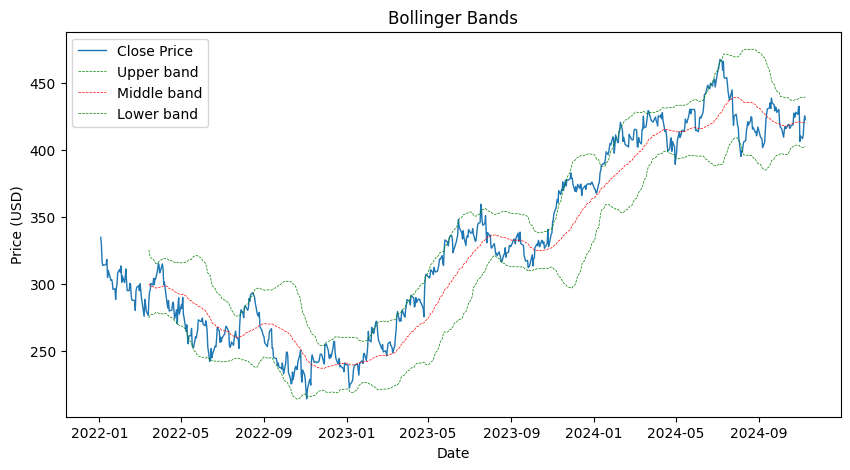

In [4]:
# Create the plot
plt.figure(figsize=(10, 5))

# Set the title and axis labels
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

plt.plot(BBANDS.Close, lw=1.0, label='Close Price')
plt.plot(data['UpperBand'], 'g--', lw=0.5, label='Upper band')
plt.plot(data['MiddleBand'], 'r--', lw=0.5, label='Middle band')
plt.plot(data['LowerBand'], 'g--', lw=0.5, label='Lower band')

# Add a legend to the axis
plt.legend()

plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [5]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-11-09 18:00:12
Python Version: 3.11.10
-----------------------------------
